# Least-squares regression

In the previous *linear* least-squares regression the dependent variable Y followed a normal distribution and the fit model was linear in the parameters.
We are now going to consider the case where Y is also normal but the fit model is not linear in the parameters.

Let us start by defining the data:

In [1]:
import numpy as np
xdata = np.array([0., 0.2, 0.4, 0.6, 0.8, 1., 1.2, 1.4, 1.6, 1.8, 2.])
ydata = np.array([0.92, 0.884, 0.626, 0.504, 0.481, 0.417, 0.288, 0.302, 0.177, 0.13, 0.158])
ysigma = np.array([0.1, 0.082, 0.067, 0.055, 0.045, 0.037, 0.03, 0.025, 0.02, 0.017, 0.014])

And a fit model depending on two parameters:

In [2]:
def fit_model(x, par):
    return par[0] * np.exp(-par[1] * x)

We made sure that the fit model is vectorized in the independent variable $x$ by using the numpy function `np.exp`.


Let us create the fitter for a non-linear least-squares fit using the `LeastSquares` class:

In [3]:
import likefit
fitter = likefit.LeastSquares(xdata, ydata, fit_model, ysigma)

The fitter required the data and the fit model just as in the linear case.  

We run the fitter by calling the `fit` method:

In [4]:
initial_parameters = np.array([1, -1])
fit_result = fitter.fit(initial_parameters)
print(fit_result)

0


In contrast with the linear least-squares case, we now had to provide some initial values for the fit parameters.
For this reason, the performance, and the stability of the fit, **always** use the linear fitter for linear models. 
We again ensured that the fit was successful by checking the return value of the `fit` method.

The fit results are:

In [5]:
fitter.print_results()

Fit summary
Estimators: [0.98876449 0.98330324]
Errors: [0.0560301 0.0475971]
Covariance matrix: [[0.00313937 0.00225085]
 [0.00225085 0.00226548]]
Correlation matrix: [[1.         0.84400534]
 [0.84400534 1.        ]]
Chi square: 18.065632960933865
Degrees of freedom: 9
Pvalue: 0.034419671405256244


We plot the fit:

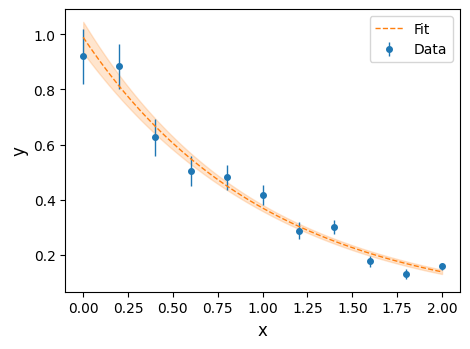

In [6]:
fitter.plot_fit()

We finally plot a density map of the cost function minimized during the fit including the related 1σ and 2σ confidence regions of the parameters.

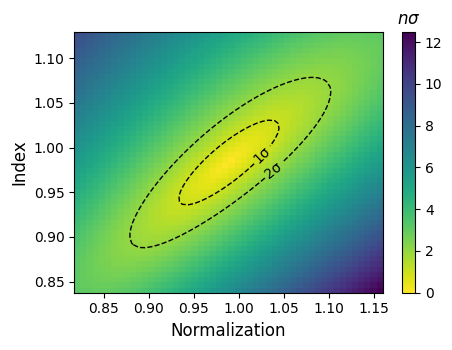

In [7]:
fitter.plot_confidence_regions(parx_index=0, pary_index=1, xlabel="Normalization", ylabel="Index")

The parameters to display are selected by their index. This is useful when the model has more than 2 parameters. We also provide some meaningful names for the fit parameters. 